<h1 style="text-align:center;color:#0F4C81">Gradient Descent</h1>

## Introduction

**Gradient descent** (GD) is an iterative first-order optimisation algorithm, used to find a local minimum/maximum of a given function. This method is commonly used in machine learning (ML) and deep learning (DL) to minimise a **cost/loss function** (e.g. in a linear regression).

Imagine you’re lost in a dense forest with no map or compass. What do you do? You follow the path of the steepest descent, taking steps in the direction that decreases the slope and brings you closer to your destination. Similarly, gradient descent is the go-to algorithm for navigating the complex landscape of `machine learning` and `deep learning`. It helps models find the optimal set of parameters by iteratively adjusting them in the opposite direction of the gradient.

However, its use is not limited to ML/DL only, it’s widely used also in areas like:

- control engineering (robotics, chemical, etc.)
- computer games
- mechanical engineering

This method was proposed long before the era of modern computers by Augustin-Louis Cauchy in 1847. Since that time, there was an significant development in computer science and numerical methods. That led to numerous improved versions of Gradient Descent. However, in this article we’re going to use a basic/vanilla version implemented in Python.

## What is a Cost Function?

It is a function that measures the performance of a model for any given data. Cost Function quantifies the error between predicted values and expected values and presents it in the form of a single real number.

After making a hypothesis with initial parameters, we calculate the Cost function. And with a goal to reduce the cost function, we modify the parameters by using the Gradient descent algorithm over the given data. Here’s the mathematical representation for it:


**Hypothesis:** $ h_{\theta}(x) = \theta_0 + \theta_1x $ \
**Parameters:** $ \theta_0, \theta_1 $ \
**Cost Function:** $ J(\theta_0, \theta_1) = \frac{1}{1m}\sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2 $ \
**Goal:** $\text{minimize}_{\theta_1 \atop \theta_2} J(\theta_0, \theta_1)$


## Function requirements

Gradient descent algorithm does not work for all functions. There are two specific requirements. A function has to be:

- **differentiable**
- **convex**

First, what does it mean it has to be differentiable? If a function is differentiable it has a derivative for each point in its domain — not all functions meet these criteria. First, let’s see some examples of functions meeting this criterion:

<img src="images/function_requirements.png" />

Typical non-differentiable functions have a step a cusp or a discontinuity:

<img src="images/function_requirements2.png" />


Next requirement — function has to be convex. For a univariate function, this means that the line segment connecting two function’s points lays on or above its curve (it does not cross it). If it does it means that it has a local minimum which is not a global one.

Mathematically, for two points x₁, x₂ laying on the function’s curve this condition is expressed as:

$$
f(\lambda x_1 + (1-\lambda)x_2) \le \lambda f(x_1) + (1 - \lambda)f(x_2)
$$

where $\lambda$ denotes a point’s location on a section line and its value has to be between 0 (left point) and 1 (right point), e.g. $\lambda$=0.5 means a location in the middle.

Below there are two functions with exemplary section lines.

<img src="images/convex_nonconvext_functions.png" />

Another way to check mathematically if a univariate function is convex is to calculate the second derivative and check if its value is always bigger than 0.

$$
\frac{d^2f(x)}{dx^2} > 0
$$

Let’s do a simple example (warning: calculus ahead!).

Let’s investigate a simple quadratic function given by:

$$
f(x) = x^2 - x + 3 
$$

Its first and second derivative are:

$$
\frac{df(x)}{dx} = 2x - 1, \frac{d2f(x)}{dx^2}=2
$$

Because the second derivative is always bigger than 0, our function is strictly convex.

It is also possible to use quasi-convex functions with a gradient descent algorithm. However, often they have so-called saddle points (called also minimax points) where the algorithm can get stuck (we will demonstrate it later in the article). An example of a quasi-convex function is:
$$f(x) = x^4 - 2x^3 + 2$$

$$
\frac{df(x)}{dx} = 4x^3 - 6x^2 = x^2(4x - 6)
$$

Let’s stop here for a moment. We see that the first derivative equal zero at $x=0$ and $x=1.5$. This places are candidates for function’s extrema (minimum or maximum) — the slope is zero there. But first we have to check the second derivative first.

$$
\frac{d^2f(x)}{dx^2} = 12x^2 + 12x = 12x(x-1)
$$

The value of this expression is zero for $x=0$ and $x=1$. These locations are called an inflexion point — a place where the curvature changes sign — meaning it changes from convex to concave or vice-versa. By analysing this equation we conclude that:

- for $x<0$: function is convex
- for $0<x<1$: function is concave (the 2nd derivative < 0)
- for $x>1$: function is convex again

Now we see that point $x=0$ has both first and second derivative equal to zero meaning this is a saddle point and point $x=1.5$ is a global minimum.

Let’s look at the graph of this function. As calculated before a saddle point is at $x=0$ and minimum at $x=1.5$.

<img src="images/saddle_function.png" />

For multivariate functions the most appropriate check if a point is a saddle point is to calculate a Hessian matrix which involves a bit more complex calculations and is beyond the scope of this article.

Example of a saddle point in a bivariate function is show below.

$$z = x^2 - y^2$$

<div style="display:flex; align-items:center;justify-content: center;background:white;">
<img src="images/bivariate_saddle_function.png" />
</div>
<p style="text-align:center;font-size:14px;">Nicoguaro, CC BY 3.0, via Wikimedia Commons</p>

## Gradient

Before jumping into code one more thing has to be explained — what is a gradient. Intuitively it is a slope of a curve at a given point in a specified direction.

In the case of a **univariate function**, it is simply the **first derivative at a selected point**. In the case of a **multivariate function**, it is a **vector of derivatives** in each main direction (along variable axes). Because we are interested only in a slope along one axis and we don’t care about others these derivatives are called **partial derivatives**.

A gradient for an n-dimensional function $f(x)$ at a given point $p$ is defined as follows:
$$
\nabla f(p) = \begin{bmatrix} 
    \frac{\partial f}{\partial x_1}(p) \\
    \vdots \\
    \frac{\partial f}{\partial x_n}(p)
\end{bmatrix}
$$
The upside-down triangle is a so-called $\text{nabla}$ symbol and you read it `del`. To better understand how to calculate it let’s do a hand calculation for an exemplary 2-dimensional function below.
$$ f(x) = 0.5x^2 + y^2 $$

<img src="images/graph1.png" />

Let’s assume we are interested in a gradient at point $p(10,10)$:
$$
\frac{\partial f(x, y)}{\partial x} = x,
\frac{\partial f(x, y)}{\partial y} = 2y
$$

so consequently:

$$\nabla f(x, y) = \begin{bmatrix}x \\ 2y \end{bmatrix}$$

$$\nabla f(10, 10) = \begin{bmatrix}10 \\ 20 \end{bmatrix}$$

By looking at these values we conclude that the slope is twice steeper along the y axis.

## Gradient Descent Algorithm

Gradient Descent Algorithm iteratively calculates the next point using gradient at the current position, scales it (by a learning rate) and subtracts obtained value from the current position (makes a step). It subtracts the value because we want to minimise the function (to maximise it would be adding). This process can be written as:

$$p_{n+1} = p_n - \eta \nabla f(p_n)$$

There’s an important parameter $\eta$ which scales the gradient and thus controls the step size. In machine learning, it is called **learning rate** and have a strong influence on performance.

- The smaller learning rate the longer GD converges, or may reach maximum iteration before reaching the optimum point
- If learning rate is too big the algorithm may not converge to the optimal point (jump around) or even to diverge completely.

In summary, Gradient Descent method’s steps are:

1. choose a starting point (initialisation)
2. calculate gradient at this point
3. make a scaled step in the opposite direction to the gradient (objective: minimise)
4. repeat points 2 and 3 until one of the criteria is met:

    - maximum number of iterations reached
    - step size is smaller than the tolerance (due to scaling or a small gradient).

## Example of Gradient Descent Algorithm

Let’s say you are playing a game in which the players are at the top of a mountain and asked to reach the lowest point of the mountain. Additionally, they are blindfolded. So, what approach do you think would make you reach the lake?

Take a moment to think about this before you read on.

The best way is to observe the ground and find where the land descends. From that position, step in the descending direction and iterate this process until we reach the lowest point.

Finding the lowest point in a hilly landscape.

<img src="images/landscape.png" />

Gradient descent is an iterative optimization algorithm for finding the local minimum of a function.

To find the local minimum of a function using gradient descent, we must take steps proportional to the negative of the gradient (move away from the gradient) of the function at the current point. If we take steps proportional to the positive of the gradient (moving towards the gradient), we will approach a local maximum of the function, and the procedure is called **Gradient Ascent**.

<img src="images/gradient_graph.png" />

Below, there’s an exemplary implementation of the Gradient Descent algorithm (with steps tracking):

In [1]:
import numpy as np
from typing import Callable


def gradient_descent(start: float, gradient: Callable[[float], float],
                     learn_rate: float, max_iter: int, tol: float = 0.01):
    x = start
    steps = [start]  # history tracking

    for _ in range(max_iter):
        diff = learn_rate*gradient(x)
        if np.abs(diff) < tol:
            break
        x = x - diff
        steps.append(x)  # history tracing
  
    return steps, x

### Example 1 — a quadratic function

Let’s take a simple quadratic function defined as:
$$ f(x) = x^2 - 4x + 1$$
Because it is an univariate function a gradient function is:
$$\frac{df(x)}{dx} = 2x - 4$$
Let’s write these functions in Python:

In [2]:
def func1(x: float):
    return x**2-4*x+1

def gradient_func1(x: float):
    return 2*x - 4

For this function, by taking a learning rate of 0.1 and starting point at x=9 we can easily calculate each step by hand. Let’s do it for the first 3 steps:

$$
x_1 = 9 - 0.1\cdot(2\cdot 9 - 4) = 7.6 \\
x_2 = 7.6 - 0.1\cdot(2\cdot7.6-4) = 6.48 \\
x_3 = 6.48 - 0.1\cdot(2\cdot6.48 - 4) = 5.584
$$

The python function is called by:

In [3]:
history, result = gradient_descent(9, gradient_func1, 0.1, 100)

The animation below shows steps taken by the GD algorithm for learning rates of 0.1 and 0.8. As you see, for the smaller learning rate, as the algorithm approaches the minimum the steps are getting gradually smaller. For a bigger learning rate, it is jumping from one side to another before converging.

<img src="images/animation.gif" />

Trajectories, number of iterations and the final converged result (within tolerance) for various learning rates are shown below:

<img src="images/various_results.png" />

### Example 2 — a function with a saddle point

Now let’s see how the algorithm will cope with a semi-convex function we investigated mathematically before.
$$ f(x) = x^4 - 2x^3 + 2$$

Below results for two learning rates and two different staring points.

<img src="images/function_wirh_saddle_point_results.png" />

Below an animation for a learning rate of 0.4 and a starting point x=-0.5.

<img src="images/saddle_point_example.gif" />

Now, you see that an existence of a saddle point imposes a real challenge for the first-order gradient descent algorithms like GD, and obtaining a global minimum is not guaranteed. Second-order algorithms deal with these situations better (e.g. Newton-Raphson method).

Investigation of saddle points and how to escape from them is a subject of ongoing studies and various solutions were proposed. For example, Chi Jin and M. Jordan proposed a Perturbing Gradient Descent algorithm — details you find in <a href="https://bair.berkeley.edu/blog/2017/08/31/saddle-efficiency/">their blog post</a>.

## Advantages and Disadvantages

#### Advantages
**Easy to use:** It’s like rolling the marble yourself – no fancy tools needed, you just gotta push it in the right direction.

**Fast updates:** Each push (iteration) is quick, you don’t have to spend a lot of time figuring out how hard to push.

**Memory efficient:** You don’t need a big backpack to carry around extra information, just the marble and your knowledge of the hill.

**Usually finds a good spot:** Most of the time, the marble will end up in a pretty flat area, even if it’s not the absolute flattest (global minimum).

#### Disadvantages
**Slow for giant hills (large datasets):** If the hill is enormous, pushing the marble all the way down each time can be super slow. There are better ways to roll for these giants.

**Can get stuck in shallow dips (local minima):** The hill might have many dips, and the marble could get stuck in one that isn’t the absolute lowest. It depends on where you start pushing it from.

**Finding the perfect push (learning rate):** You need to figure out how har to push the marble (learning rate). If you push too weakly, it’ll take forever to get anywhere. Push too hard, and it might roll right past the flat spot.

### Finding linear regresion model coefficients using Gradient Descent algorithm

In [22]:
import numpy as np

# Input data
X = np.array([
    [1, 3],
    [3, 4],
    [2, 6],
    [4, 1],
    [1, 7]
])

# Expected output
y = np.array([5, 7, 10, 5, 6])

# Add constant axis for beta 0
n = len(X)
X = np.c_[np.ones((n, 1)), X]

# Define step size and max iterations
step_size = 0.01
iterations = 10000

# Random initial coefficients
coef = np.random.rand(X.shape[1])

for i in range(iterations):
    y_pred = X @ coef
    errors = y - y_pred
    gradients = -2/n*(X.T @ errors)
    coef -= step_size * gradients
    
print(coef)

[1.12734991 0.90892932 0.82690399]


In [25]:
y_pred = X @ coef
np.c_[y, y_pred, y-y_pred]

array([[ 5.        ,  4.5169912 ,  0.4830088 ],
       [ 7.        ,  7.16175382, -0.16175382],
       [10.        ,  7.90663249,  2.09336751],
       [ 5.        ,  5.58997116, -0.58997116],
       [ 6.        ,  7.82460717, -1.82460717]])

### Finding minimum coordinate of parabolic function with GD Algo

-22.67
-22.343300000000003
-22.019867
-21.69966833
-21.3826716467
-21.068844930233002
-20.758156480930673
-20.450574916121365
-20.146069166960153
-19.844608475290553
-19.546162390537646
-19.25070076663227
-18.958193758965947
-18.668611821376288
-18.381925703162526
-18.098106446130902
-17.817125381669594
-17.5389541278529
-17.263564586574372
-16.990928940708628
-16.721019651301543
-16.453809454788527
-16.189271360240642
-15.927378646638235
-15.668104860171853
-15.411423811570135
-15.157309573454434
-14.90573647771989
-14.65667911294269
-14.410112321813264
-14.16601119859513
-13.92435108660918
-13.685107575743087
-13.448256499985657
-13.2137739349858
-12.981636195635943
-12.751819833679583
-12.524301635342788
-12.29905861898936
-12.076068032799466
-11.85530735247147
-11.636754278946755
-11.420386736157289
-11.206182868795716
-10.994121040107759
-10.784179829706682
-10.576338031409616
-10.37057465109552
-10.166868904584565
-9.965200215538719
-9.765548213383331
-9.567892731249499
-9.372213

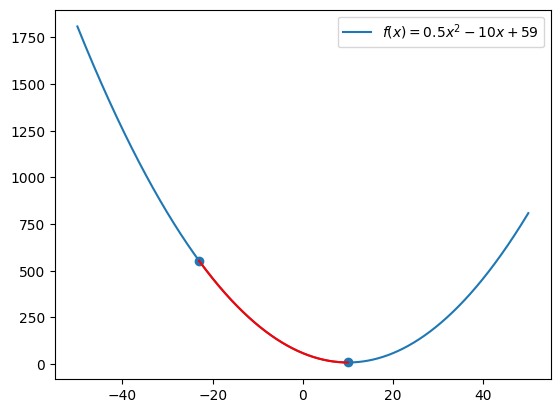

In [71]:
import random
import matplotlib.pyplot as plt

def f(x):
    return 0.5*x**2 - 10*x + 59

def grad(x):
    return x - 10

step_size = 0.01
iterations = 100_000
tolerance = 0.000001

x = random.randint(-50, 50) # Random value
scatter_vals_x = [x]
scatter_vals_y = [f(x)]

vals = [x]
for i in range(iterations):
    g = grad(x)
    if abs(g) < tolerance:
        print('BREAK')
        break
    x = x - step_size * g
    vals.append(x)
    print(x)
else:
    print('NO BREAK')
print(f"{i=}")

scatter_vals_x.append(x)
scatter_vals_y.append(f(x))
a = np.linspace(-50, 50, 1000)
plt.plot(a, [f(i) for i in a], label="$f(x)=0.5x^2-10x+59$")
plt.plot(vals, [f(val) for val in vals], c='r')
plt.scatter(scatter_vals_x, scatter_vals_y)
plt.legend()
plt.show()

### Resources for this content:

<a href="https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21">Gradient Descent Algorithm — a deep dive</a>

<a href="https://www.analyticsvidhya.com/blog/2020/10/how-does-the-gradient-descent-algorithm-work-in-machine-learning/">
Gradient Descent Algorithm: How Does it Work in Machine Learning?</a>